In [398]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t_dist
from scipy.stats import norm

import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

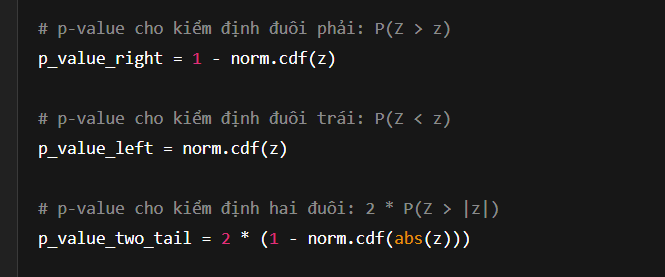

đuôi trái: P()

z:
- đuôi trái: norm.cdf(z)
- đuôi phải: 1 - norm.cdf(z)
- 2 phái: 2 * (1 - norm.cdf(abs(z)))

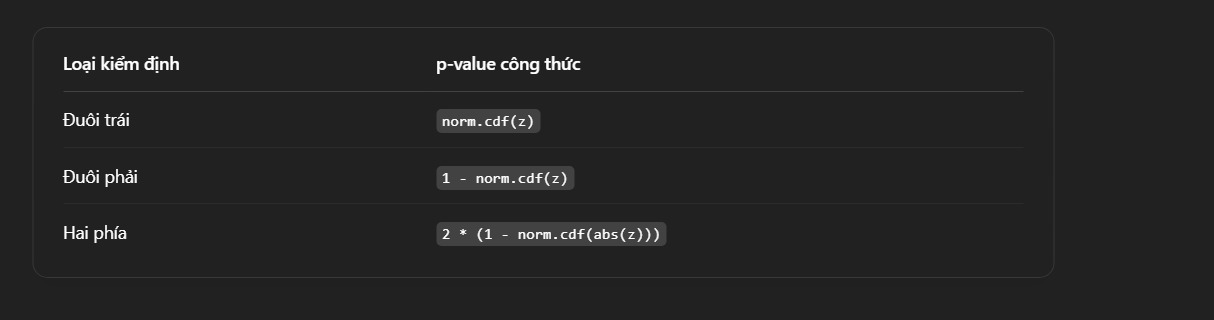

t:
- đuôi trái: t_dist.cdf(t, df=n-1)
- đuôi phải: 1 - t_dist.cdf(t, df=n-1)
- 2 phái: 2 * (1 - t_dist.cdf(abs(t), df=n-1))

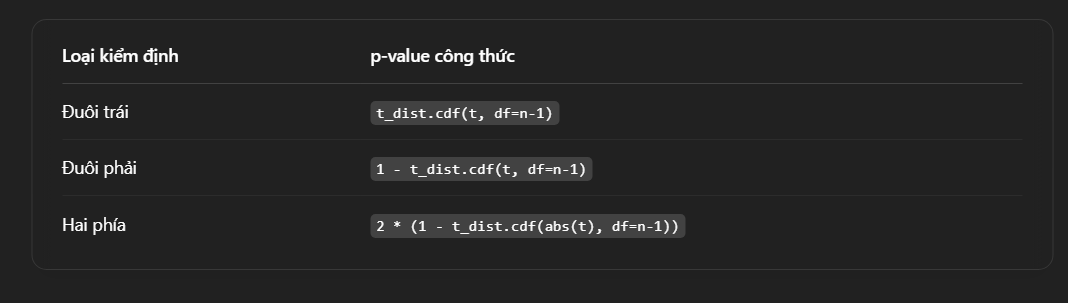

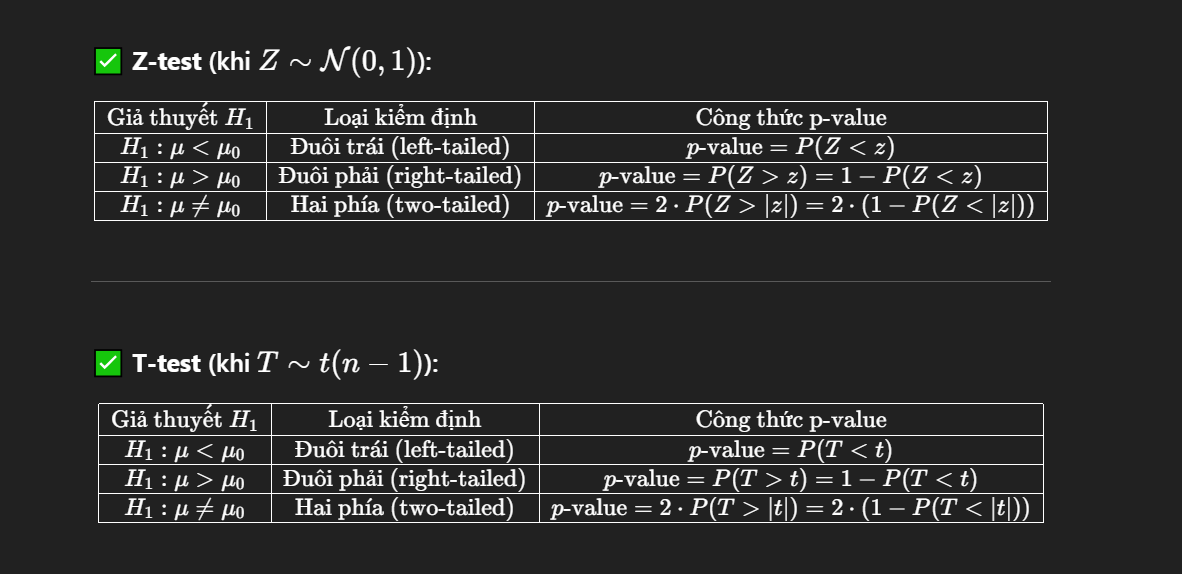

In [399]:
df = pd.read_csv("../data/dataKHXH.csv")
df.head()

,sbd,toan,ngu_van,ngoai_ngu,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,8.75,6.50,8.50,N1
2,1000004,7.8,8.25,7.8,4.50,6.25,8.25,N1
3,1000005,7.2,8.00,7.8,4.75,6.75,8.25,N1
4,1000006,7.6,9.25,9.0,8.50,7.25,9.75,N1


### Đề bài 1:

Lấy ngẫu nhiên 1000 học sinh từ bộ dữ liệu. Có nhận xét rằng: "Từ 85% học sinh đạt điểm GDCD từ 8 trở lên.". Hãy kiểm định nhận xét trên với mức ý nghĩa 5%.

In [400]:
new_df = df["gdcd"]
new_df.head()

0    9.00
1    8.50
2    8.25
3    8.25
4    9.75
Name: gdcd, dtype: float64

In [401]:
n = 1000
sample = new_df.sample(n, random_state=15)
x = (sample >= 8).sum()
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x ≥ 7): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 1000
Số đạt điều kiện (x ≥ 7): 696
Tỷ lệ mẫu (p̂): 0.6960
n * p̂ = 696.00
n * (1 - p̂) = 304.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ thí sinh có điểm GDCD trên 8. Ta cần kiểm định giả thuyết:

$H_0 : p \ge 0.85$: Có từ 85% thí sinh khối KHXH có điểm GDCD cao hơn 8.0

$H_1: p < 0.85$: Có dưới 85% thí sinh khối KHXH có điểm GDCD cao hơn 8.0

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [402]:
p = 0.85
alpha = 0.05

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.6960$, $n\hat{p} = 696.00 \geq 5$
    - $n(1-\hat{p}) = 304.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức khoảng tin cậy
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [403]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -13.6385


Vì $H_1$ là $<$ là kiểm định đuôi trái nên ta có
$$
p\text{-value} =  P(T < t)
$$

In [404]:
p_value = norm.cdf(z)
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 1.1823614610783807e-42
→ Bác bỏ H0


Vì $p_{value} = 1.18e^-42 < \alpha=0.05$ nên ta kết luận: Đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài 2:

Lấy ngẫu nhiên 600 học sinh từ bộ dữ liệu. Có nhận xét rằng: "Từ 80% học sinh đạt điểm Địa lý trên 6.5". Hãy kiểm định nhận xét này với mức ý nghĩa 5%.

In [405]:
new_df = df["dia_li"]
new_df.head()

0    6.00
1    6.50
2    6.25
3    6.75
4    7.25
Name: dia_li, dtype: float64

In [406]:
n = 600
sample = new_df.sample(n, random_state=15)
x = (sample > 6.5).sum()
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x ≥ 8): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 600
Số đạt điều kiện (x ≥ 8): 221
Tỷ lệ mẫu (p̂): 0.3683
n * p̂ = 221.00
n * (1 - p̂) = 379.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ thí sinh có điểm Địa lí trên 6.5. Ta cần kiểm định giả thuyết:

$H_0 : p > 0.8$: Có từ 80% thí sinh khối KHXH có điểm Địa Lí cao hơn 6.5

$H_1: p \le 0.8$: Có dưới 80% thí sinh khối KHXH có điểm Địa Lí cao hơn 6.5

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [407]:
p = 0.8
alpha = 0.05

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.4400$, $n\hat{p} = 264.00 \geq 5$
    - $n(1-\hat{p}) = 336.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức thống kê kiểm định tính như sau:
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [408]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -26.4341


Vì $H_1$ là $<$ là kiểm định đuôi trái nên ta có
$$p_{values} = P(Z<z)$$

In [409]:
p_value = norm.cdf(z)
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 2.7811860329413618e-154
→ Bác bỏ H0


Vì $p_{value} = 2.781e^-154 < \alpha=0.05$ nên ta kết luận: Đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài 3:

Một lớp học sinh có điểm trung bình môn Toán là 6.3. Một giáo viên mới đưa ra đề kiểm tra khác và lấy mẫu ngẫu nhiên 40 học sinh thấy điểm trung bình là 6.55 với độ lệch chuẩn mẫu s = 1.2. Hãy kiểm định nhận xét rằng đề mới làm thay đổi điểm trung bình, với mức ý nghĩa 5%.

In [410]:
n = 40
sample_mean = 6.55
sample_std = 1.2

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Số mẫu (n): 40
Trung bình mẫu (x̄): 6.5500
Độ lệch chuẩn mẫu (s): 1.2000
────────────────────────────────────────────────────


Gọi $\mu$ là điểm trung bình toán của lớp. Ta cần kiểm định giả thuyết:

$H_0 : \mu = 6.3$: Điểm trung bình môn toán của lớp không thay đổi so với đề cũ

$H_1: \mu  \neq 6.3$: Điểm trung bình môn toán của lớp thay đổi so với đề cũ

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [411]:
mu = 6.3
alpha = 0.05

Không biết σ, mẫu lớn (n > 30), Theo định lý **Giới hạn Trung tâm** phân phối t-Student trở nên gần giống hơn với phân phối chuẩn Z => Dùng t-Test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [412]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = 1.3176


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có:
$$p\text{-value} = 2 \cdot P(T > |t|)$$

In [413]:
p_value = 2 * (1 - norm.cdf(abs(t)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.1876323299948841
→ Chấp nhận H0


Vì $p_{value} = 0.093 > \alpha=0.05$ nên ta kết luận: Không đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài 4:


Theo kế hoạch, học sinh cần 45 phút để hoàn thành bài thi môn GDCD.
Một phương pháp mới được áp dụng để rút ngắn thời gian làm bài.
Để đánh giá, người ta lấy mẫu 30 học sinh, ghi nhận thời gian trung bình hoàn thành là 43.5 phút, độ lệch chuẩn mẫu là 3.8 phút.

Hãy kiểm định nhận định rằng phương pháp mới giúp giảm thời gian làm bài, với mức ý nghĩa 5%.

In [414]:
n = 30
sample_mean = 43.5
sample_std = 3.8

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Số mẫu (n): 30
Trung bình mẫu (x̄): 43.5000
Độ lệch chuẩn mẫu (s): 3.8000
────────────────────────────────────────────────────


Gọi $\mu$ là thời gian trung bình hoàn thành bài làm. Ta cần kiểm định giả thuyết:

$H_0 : \mu \ge 45$: thời gian trung bình hoàn thành bài làm không giảm

$H_1: \mu < 45$: thời gian trung bình hoàn thành bài làm nhanh hơn

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [415]:
mu = 45
alpha = 0.05

Không biết σ, mẫu lớn (n > 30), Theo định lý **Giới hạn Trung tâm** phân phối t-Student trở nên gần giống hơn với phân phối chuẩn Z => Dùng t-Test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [416]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = -2.1621


Vì $H_1$ là < là kiểm định đuôi trái nên ta có:
$$p\text{-value} = P(T < t)$$

In [417]:
p_value = t_dist.cdf(t, df=n-1)
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.019500989765842542
→ Bác bỏ H0


Vì $p_{value} = 0.015306670766365908 < \alpha=0.05$ nên ta kết luận: đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài 5: 

Một cuộc khảo sát năm ngoái cho thấy 60% học sinh thích học online.
Năm nay, khảo sát 400 học sinh, ghi nhận có 228 học sinh thích học online.
Hãy kiểm định với mức ý nghĩa 5% xem tỷ lệ học sinh thích học online năm nay có thay đổi so với năm ngoái hay không.

In [418]:
n = 400
x = 228
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 400
Số đạt điều kiện (x): 228
Tỷ lệ mẫu (p̂): 0.5700
n * p̂ = 228.00
n * (1 - p̂) = 172.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ học sinh thích học onl. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.6$: tỷ lệ học sinh thích học onl không thay đổi

$H_1: p \ne 0.6$: tỷ lệ học sinh thích học onl có thay đổi

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [419]:
p = 0.6
alpha = 0.05

- Học sinh thích học hay không thích học onl độc lập với nhau nên tỷ lệ học sinh thích học onl tuân theo phân phối nhị thức
- Ta có
    - $\hat{p}=0.5700$, $n\hat{p} = 228.00 \geq 5$
    - $n(1-\hat{p}) = 172.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức khoảng tin cậy
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [420]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -1.2247


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có
$$
p\text{-value} =  2 * P(T > |t|)
$$

In [421]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.22067136191984638
→ Chấp nhận H0


Vì $p_{value} = 0.22067136191984638 > \alpha=0.05$ nên ta kết luận: không đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài 6:

Trọng lượng trung bình khi xuất chuồng ở một trại chăn nuôi trước là 3.3 kg/con. Năm nay người ta sử dụng một loại thức ăn mới, cân thử 15 con khi xuất chuồng ta được các số liệu như sau:
   
3.25, 2.50, 4.00, 3.75, 3.80,
3.90, 4.02, 3.60, 3.80, 3.20, 
3.82, 3.40, 3.75, 4.00, 3.50
    
Giả thiết trọng lượng gà là đại lượng ngẫu nhiên phân phối theo quy luật chuẩn.

a. Với mức ý nghĩa α = 0.05. Hãy cho kết luận về tác dụng của loại thức ăn này? 

b. Nếu trại chăn nuôi báo cáo trọng lượng trung bình khi xuất chuồng là 3.5 kg/con thì có chấp nhận được không? (α = 0.05).

_Đáp án. (a) t = 3.0534. Thức ăn mới này làm thay đổi trọng lượng gà.
(b) t = 1.1409. Trại chăn nuôi báo cáo trọng lượng trung bình khi xuất chuồng là chấp nhận được_


In [422]:
sample_data = [3.25, 2.50, 4.00, 3.75, 3.80,
               3.90, 4.02, 3.60, 3.80, 3.20,
               3.82, 3.40, 3.75, 4.00, 3.50]

n = len(sample_data)
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

sample_series = pd.Series(sample_data)
print(f"Skewness: {sample_series.skew():.4f}")

────────────────────────────────────────────────────
Số mẫu (n): 15
Trung bình mẫu (x̄): 3.6193
Độ lệch chuẩn mẫu (s): 0.4050
────────────────────────────────────────────────────
Skewness: -1.6345


Gọi $\mu$ là cân nặng trung bình của gà:

$H_0 : \mu = 3.3$: Cân nặng trung bình của gà không thay đổi khi thay thức ăn

$H_1: \mu  \neq 3.3$: Cân nặng trung bình của gà có thay đổi khi thay thức ăn

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [423]:
mu = 3.3
alpha = 0.05

Không biết σ, mẫu nhỏ (n < 30), phân phối là phân phối chuẩn => Dùng t-Test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [424]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = 3.0535


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có
$$
p\text{-value} =  2 * P(T > |t|)
$$

In [425]:
df = n - 1
p_value = 2 * (1 - t_dist.cdf(abs(t), df=n-1))


print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.00858939259541125
→ Bác bỏ H0


Vì $p_{value} = 0.00226165017086144 < \alpha=0.05$ nên ta kết luận: đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


In [426]:
# b
t = (sample_mean - 3.5) / (sample_std / np.sqrt(n))

df = n - 1
p_value = 2 * (1 - t_dist.cdf(abs(t), df=n-1))

print(f"t = {t:.4f}")

print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


t = 1.1411
p-value: 0.2729762492377492
→ Chấp nhận H0


Vì $p_{value} = 0.07650062642667144 > \alpha=0.05$ nên ta kết luận: không bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài 7

Tỷ lệ phế phẩm của một nhà máy trước đây là 5%. Năm nay nhà máy áp dụng một biện pháp kỹ thuật mới. Để nghiên cứu tác dụng của biện pháp kỹ thuật mới, người ta lấy một mẫu gồm 800 sản phẩm để kiểm tra và thấy có 24 phế phẩm.
    
a. Với α = 0.01. Hãy cho kết luận về biện pháp kỹ thuật mới này?
    
b. Nếu nhà máy báo cáo tỷ lệ phế phẩm sau khi áp dụng biện pháp kỹ thuật mới là 2% thì có chấp nhận được không? (α = 0.01).
    
_Đáp án. (a) z = −2.5955. Biện pháp kĩ thuật mới làm thay đổi tỉ lệ phế phẩm (b) z = 2.0203. Nhà máy báo cáo tỷ lệ phế phẩm là chấp nhận được._

In [427]:
n = 800
x = 24
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 800
Số đạt điều kiện (x): 24
Tỷ lệ mẫu (p̂): 0.0300
n * p̂ = 24.00
n * (1 - p̂) = 776.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ sản xuất ra hàng phế phẩm. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.05$: tỷ lệ sản xuất phế phẩm thay đổi khi dùng biện pháp kỹ thuật mới

$H_1: p \ne 0.05$: tỷ lệ sản xuất phế phẩm không thay đổi khi dùng biện pháp kỹ thuật mới

$\alpha=0.01$

In [428]:
p = 0.05
alpha = 0.01

- Tỷ lệ hàng có hay không là hàng phế phẩm độc lập với nhau nên tỷ lệ sản xuất hàng phế phẩm tuân theo phân phối nhị thức
- Ta có
    - $\hat{p}=0.0300$, $n\hat{p} = 24.00 \geq 5$
    - $n(1-\hat{p}) = 776.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức khoảng tin cậy
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [429]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -2.5955


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có
$$
p\text{-value} =  2 * P(T > |t|)
$$

In [430]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.009444165687832573
→ Bác bỏ H0


Vì $p_{value} = 0.009444165687832573 > \alpha=0.05$ nên ta kết luận: không bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 99%


b/

Gọi $p$ là tỷ lệ sản xuất ra hàng phế phẩm. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.02$: tỷ lệ sản xuất phế phẩm thay đổi khi dùng biện pháp kỹ thuật mới

$H_1: p \ne 0.02$: tỷ lệ sản xuất phế phẩm không thay đổi khi dùng biện pháp kỹ thuật mới

$\alpha=0.01$

In [ ]:
p = 0.02
alpha = 0.01

z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


#     print("b) Kiểm định p = 0.02 (báo cáo):")
# print(f"z = {z_b:.4f}")
# print(f"p-value = {p_value_b:.4f}")
# if p_value_b < alpha:
#     print("→ Bác bỏ H₀. Tỷ lệ phế phẩm thực tế KHÁC 2%.")
# else:
#     print("→ Chấp nhận H₀. Tỷ lệ 2% là CHẤP NHẬN được.")
# print("────────────────────────────────────────────")


Z = 2.0203
p-value: 0.04335175126086277
→ Chấp nhận H0


### Đề bài 9

Trong thập niên 80, trọng lượng trung bình của thanh niên là 48 kg. Nay để xác định lại trọng lượng ấy, người ta chọn ngẫu nhiên 100 thanh niên đo trọng lượng trung bình là 50 kg và phương sai mẫu $s^2 = (10 kg)^2$. Thử xem trọng lượng thanh niên hiện nay phải chăng có thay đổi, với mức ý nghĩa là 1%?

   _Đáp án. Trọng lượng thanh niên hiện nay không thay đổi so với trước kia._

In [433]:
n = 100
sample_mean = 50
sample_std = 10

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Số mẫu (n): 100
Trung bình mẫu (x̄): 50.0000
Độ lệch chuẩn mẫu (s): 10.0000
────────────────────────────────────────────────────


Gọi $\mu$ là trọng lượng trung bình của thanh niên:

$H_0 : \mu = 4.8$: trọng lượng trung bình của thanh niên ngày nay không  thay đổi

$H_1: \mu  \neq 4.8$: trọng lượng trung bình của thanh niên ngày nay có thay đổi

Mức ý nghĩa là: $1\% => \alpha=0.01$

In [434]:
mu = 48
alpha = 0.01

Không biết σ, mẫu lớn (n > 30), Theo định lý **Giới hạn Trung tâm** phân phối t-Student trở nên gần giống hơn với phân phối chuẩn Z => Dùng t-Test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [435]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = 2.0000


Vì $H_1$ là $\ne$ là kiểm định đuôi trái nên ta có:
$$p\text{-value} = 2 * P(T > |t|)$$

In [436]:
p_value = 2 * (1 - t_dist.cdf(abs(t), df=n-1))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.04823969337263301
→ Chấp nhận H0


### Đề bài 10

Một cửa hàng thực phẩm nhận thấy thời gian vừa qua trung bình một khách hàng mua 25 ngàn đồng thực phẩm trong ngày. Nay cửa hàng chọn ngẫu nhiên 15 khách hàng thấy trung bình một khách hàng mua 24 ngàn đồng trong ngày và phương sai mẫu là $s^2$ =  (2 ngàn đồng $)^2$

   Với mức ý nghĩa là 5%, kiểm định xem có phải sức mua của khách hàng hiện nay thực sự giảm sút hay không. Biết rằng sức mua của khách hàng có phân phối chuẩn.

   _Đáp án. Sức mua của khách hàng hiện nay thực sự giảm sút_

In [437]:
n = 15
sample_mean = 24
sample_std = 2

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Số mẫu (n): 15
Trung bình mẫu (x̄): 24.0000
Độ lệch chuẩn mẫu (s): 2.0000
────────────────────────────────────────────────────


Gọi $\mu$ là số tiền thực phẩm khách hàng mua trong ngày:

$H_0 : \mu \ge 25$: sức mua không thay đổi

$H_1: \mu  < 25$: sức mua giảm sút

Mức ý nghĩa là: $1\% => \alpha=0.01$

In [438]:
mu = 25
alpha = 0.05

Sức mua khách hàng theo phân phối chuẩn, mẫu lớn (n < 30) => Dùng t-test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [439]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = -1.9365


Vì $H_1$ là $<$ là kiểm định đuôi trái nên ta có:
$$p\text{-value} =  P(Z < z)$$

In [440]:
p_value = t_dist.cdf(t, df=n-1)  
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.03662922171990769
→ Bác bỏ H0


### Đề bài 11:

Một máy sản suất tự động, lúc đầu tỷ lệ sản phẩm loại A là 20%. Sau khi áp dụng một phương pháp cải tiến sản xuất mới, người ta lấy 40 mẫu, mỗi mẫu gồm 10 sản phẩm đề kiểm tra. Kết quả kiểm tra cho ở bảng sau:

| **Số sản phẩm loại A** |  1   |  2   |  3   |  4   |  5   |  6   |  7   |  8   |  9   |  10  |
| ---------------------- | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| **Số mẫu**             |  2   |  0   |  4   |  6   |  8   |  10  |  4   |  5   |  1   |  0   |

 Với mức ý nghĩa 5%. Hãy cho kết luận về phương pháp sản suất này. 

 _Đáp án.Phương pháp cải tiến sản xuất mới thay đổi tỉ lệ sản phẩm loại A_

In [441]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  
f = np.array([2, 0, 4, 6, 8, 10, 4, 5, 1, 0])   

n = 400
x = np.sum(x * f)
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 400
Số đạt điều kiện (x): 215
Tỷ lệ mẫu (p̂): 0.5375
n * p̂ = 215.00
n * (1 - p̂) = 185.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ sản xuất ra hàng loại A. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.2$: phương pháp mới không thay đổi tỷ lệ sản phẩm loại A

$H_1: p \ne 0.2$: phương pháp mới có thay đổi tỷ lệ sản phẩm loại A

$\alpha=0.05$

In [442]:
p = 0.2
alpha = 0.05

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.5375$, $n\hat{p} = 215.00 \geq 5$
    - $n(1-\hat{p}) = 185.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức thống kê kiểm định tính như sau:
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [443]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = 16.8750


Vì $H_1$ là $\ne$ là kiểm định đuôi trái nên ta có:
$$p\text{-value} =  2 * (1 - P(Z > |z|))$$

In [444]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.0
→ Bác bỏ H0


### Đề bài 12:

Tỷ lệ phế phẩm của một nhà máy trước đây là 5%. Năm nay nhà máy áp dụng một biện pháp kỹ thuật mới. Để nghiên cứu tác dụng của biện pháp kỹ thuật mới, người ta lấy một mẫu gồm 800 sản phẩm để kiểm tra và thấy có 24 phế phẩm.

a. Với α = 0.01. Hãy cho kết luận về biện pháp kỹ thuật mới này?

b. Nếu nhà máy báo cáo tỷ lệ phế phẩm sau khi áp dụng biện pháp kỹ thuật mới là
2% thì có chấp nhận được không? (α = 0.01).

_Đáp án. (a) Biện pháp kĩ thuật mới làm thay đổi tỉ lệ phế phẩm (b) Nhà máy báo cáo tỷ lệ phế phẩm là chấp nhận được._

In [445]:
n = 800
x = 24

p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 800
Số đạt điều kiện (x): 24
Tỷ lệ mẫu (p̂): 0.0300
n * p̂ = 24.00
n * (1 - p̂) = 776.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ sản xuất ra hàng phế phẩm. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.05$: phương pháp mới không thay đổi tỷ lệ sản phẩm phế phẩm

$H_1: p \ne 0.05$: phương pháp mới có thay đổi tỷ lệ sản phẩm phế phẩm

$\alpha=0.01$

In [446]:
p = 0.05
alpha = 0.01

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.0300$, $n\hat{p} = 24.00 \geq 5$
    - $n(1-\hat{p}) = 776.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức thống kê kiểm định tính như sau:
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [447]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -2.5955


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có:
$$p\text{-value} =  2 * (1 - P(Z > |z|))$$

In [448]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.009444165687832573
→ Bác bỏ H0


In [449]:
# b
p = 0.02
alpha = 0.01

z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


Z = 2.0203
p-value: 0.04335175126086277
→ Chấp nhận H0


### Đề bài 13:

Dataset 18 (__M&M__) chứa thông tin trọng lượng và màu sắc của mẫu các viên kẹo của hãng M&M. 

Sử dụng mẫu trên bạn hãy kiểm tra phát biểu sau: __"20% kẹo M&M có màu đỏ"__ với mức ý nghĩa là 5%

*Hướng dẫn: tính tỷ lệ các viên kẹo có màu đỏ từ dữ liệu, sử dụng kết quả để kiểm định phát biểu trên*

In [450]:
# Bước 1: Đọc file CSV
df = pd.read_csv("../data/18_M_M.csv")

df.head()

,Red,Orange,Yellow,Brown,Blue,Green
0,0.751,0.735,0.883,0.696,0.881,0.925
1,0.841,0.895,0.769,0.876,0.863,0.914
2,0.856,0.865,0.859,0.855,0.775,0.881
3,0.799,0.864,0.784,0.806,0.854,0.865
4,0.966,0.852,0.824,0.840,0.810,0.865


In [451]:
n = df.count().sum()
x = len(df["Red"])

p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")


────────────────────────────────────────────────────────
Số mẫu (n): 100
Số đạt điều kiện (x): 27
Tỷ lệ mẫu (p̂): 0.2700
n * p̂ = 27.00
n * (1 - p̂) = 73.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ là kẹo M&M có màu đỏ. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.2$: Có 20% kẹo M&M có màu đỏ

$H_1: p \ne 0.2$: Không có 20% kẹo M&M có màu đỏ

$\alpha=0.05$

In [452]:
p = 0.2
alpha = 0.05

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}= 0.2700$, $n\hat{p} = 27.00 \geq 5$
    - $n(1-\hat{p}) = 73.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức thống kê kiểm định tính như sau:
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [453]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = 1.7500


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có:
$$p\text{-value} =  2 * (1 - P(Z > |z|))$$

In [454]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.08011831372763423
→ Chấp nhận H0


### Đề bài 14

Dataset 3 (__FRESH15__) chứa thông tin khảo sát những thay đổi về trọng lượng (weight - WT) và chỉ số khối của cơ thể (BMI) của sinh viên năm nhất tại một trường Đại Học. Thời điểm khảo sát là bắt đầu học kỳ (tháng 9 - SEP) và kết thúc học kỳ (tháng 4 - APR), các sinh viên được chọn ngẫu nhiên trong trường.

Sử dụng mẫu trên, hãy kiểm tra phát biểu:__"50% số sinh viên trong trường là nam"__ với mức ý nghĩa 50%

Các thuộc tính trong bộ dữ liệu:
- SEX: Giới tính
- WTSEP: trọng lượng đo vào tháng 9 (mới nhập học)
- WTAPR: trọng lượng đo vào tháng 4 (kết thúc năm học)
- BMISP: BMI tháng 9
- BMIAP: BMI tháng 4

In [455]:
# Bước 1: Đọc file CSV
df = pd.read_csv("../data/FRESH15.csv")

df.head()

,SEX,WTSEP,WTAPR,BMISP,BMIAP
0,M,72,59,22.02,18.14
1,M,97,86,19.70,17.44
2,M,74,69,24.09,22.43
3,M,93,88,26.97,25.57
4,F,68,64,21.51,20.10


In [456]:
n = df["SEX"].count()
x = len(df[df["SEX"] == "M"])

p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")


────────────────────────────────────────────────────────
Số mẫu (n): 67
Số đạt điều kiện (x): 32
Tỷ lệ mẫu (p̂): 0.4776
n * p̂ = 32.00
n * (1 - p̂) = 35.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ sinh viên nam. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.5$: Có 50% là sinh vien nam

$H_1: p \ne 0.5$: Không có 50% là sinh vien nam

$\alpha=0.05$

In [457]:
p = 0.5
alpha = 0.05

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}= 0.4776$, $n\hat{p} = 32.00 \geq 5$
    - $n(1-\hat{p}) = 35.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức thống kê kiểm định tính như sau:
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [458]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -0.3665


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có:
$$p\text{-value} =  2 * (1 - P(Z > |z|))$$

In [459]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.713985795669382
→ Chấp nhận H0


### Đề bài 15

Dataset 19(__SCREWS__) chứa thông tin khảo sát chiều dài một số đinh ốc được cung cấp bởi công ty Crown Bolt (đơn vị inches)

Trên bao bì của các đinh ốc do công ty sản xuất có ghi chiều dài của các đinh ốc là 3/4 inches. Sử dụng mẫu trên bạn hãy cho biết chiều dài của đinh ốc lấy từ mẫu thu nhận được từ dữ liệu trên có nhất quán với chiều dài ghi trên bao bì hay không? Kiểm định với mức ý nghĩa 5%

In [460]:
df = pd.read_csv("../data/19_SCREWS.csv", header=None)
df.columns= ["screw"]

df.head()

,screw
0,0.757
1,0.723
2,0.754
3,0.737
4,0.757


In [461]:
n = df.shape[0]
sample_mean = df["screw"].mean()
sample_std = df["screw"].std()

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Số mẫu (n): 50
Trung bình mẫu (x̄): 0.7468
Độ lệch chuẩn mẫu (s): 0.0123
────────────────────────────────────────────────────


Gọi $\mu$ là độ dài trung bình của đinh. Ta cần kiểm định giả thuyết:

$H_0 : \mu = 0.75$: độ dài trung bình của đinh bằng 0.75 inches

$H_1: \mu \ne 0.75$: độ dài trung bình của đinh không bằng 0.75 inches

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [462]:
mu = 0.75
alpha = 0.05

Không biết σ, mẫu lớn (n > 30), Theo định lý **Giới hạn Trung tâm** phân phối t-Student trở nên gần giống hơn với phân phối chuẩn Z => Dùng t-Test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [463]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = -1.8249


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có:
$$p\text{-value} = 2 * (1 - P(T > |t|))$$

In [464]:
p_value = 2 * (1 - t_dist.cdf(abs(t), df=n-1))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.07411353815940824
→ Chấp nhận H0


### Đề bài 16

Dataset 2 __(BODYTEMP)__ chứa thông tin khảo sát nhiệt độ cơ thể từ một nhóm người vào cùng một thời điểm lúc 12h trưa.

Có một phát biểu nói rằng, nhiệt độ cơ thể người đo lúc 12h trưa trong quần thể này là 98,6°

Dựa vào mẫu trên, bạn hãy cho biết phát biểu trên đúng hay sai ở mức ý nghĩa là 5%.

In [465]:
df = pd.read_csv("../data/02_BODYTEMP.csv", header=None)
df.columns = ["temp"]

df.head()

,temp
0,98.6
1,98.6
2,98.0
3,98.0
4,99.0


In [466]:
n = df.shape[0]
sample_mean = df["temp"].mean()
sample_std = df["temp"].std()

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Số mẫu (n): 106
Trung bình mẫu (x̄): 98.2000
Độ lệch chuẩn mẫu (s): 0.6229
────────────────────────────────────────────────────


Gọi $\mu$ là độ dài trung bình của đinh. Ta cần kiểm định giả thuyết:

$H_0 : \mu = 98.6$: độ dài trung bình của đinh bằng 0.75 inches

$H_1: \mu \ne 98.6$: độ dài trung bình của đinh không bằng 0.75 inches

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [467]:
mu = 98.6
alpha = 0.05

Không biết σ, mẫu lớn (n > 30), Theo định lý **Giới hạn Trung tâm** phân phối t-Student trở nên gần giống hơn với phân phối chuẩn Z => Dùng t-Test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [468]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = -6.6115


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có:
$$p\text{-value} = 2 * (1 - P(T > |t|))$$

In [469]:
p_value = 2 * (1 - t_dist.cdf(abs(t), df=n-1))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 1.6266559210720288e-09
→ Bác bỏ H0
